In [31]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
import re
import json
import numpy as np

In [2]:
with open ("C:\\Users\\emzou\Desktop\\pol\\dei_post_numbers.txt", 'r') as f:
    lines = f.readlines()
deipostn = [m.strip() for m in lines]
deipostn = [int(m) for m in deipostn]

In [3]:
dm = pd.read_csv("C:\\Users\\emzou\\Desktop\\pol\\deiOPpostPROCTEXT.csv")

In [4]:
deimensh = dm

In [37]:
contractions = {"won't": "wont", "can't": "cant", "n't": "nt", "'re": "re", "'s": "s", "'ll": "ll", "'d": "d", "'ve": "ve", "'m": "m"}

contraction_pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in contractions.keys()) + r')\b')

def normalize_contractions(text):
    return contraction_pattern.sub(lambda m: contractions[m.group(0).lower()], text)

# Use a simpler tokenization method
def tokenize_and_clean(text):
    if not isinstance(text, str) or pd.isna(text):
        return []
    # Use a regular expression to tokenize and filter alphanumeric tokens
    return re.findall(r'\b\w+\b', text)

# Consolidate the processing into a single function
def process_text_to_tokens(text):
    if not isinstance(text, str) or pd.isna(text):
        return ""
    text = text.replace("\\n", " ").strip().lower()
    text = normalize_contractions(text)
    tokens = tokenize_and_clean(text)
    return " ".join(tokens)

# Example of batch processing if working with a pandas DataFrame
def process_sentences(sentences):
    return sentences.apply(process_text_to_tokens)

In [39]:
deimensh['T-Text'] = process_sentences(deimensh['text'])

In [40]:
deimensh['Reply To'] = deimensh['Reply To'].astype(str)
deimensh['post_id'] = deimensh['post_id'].astype(str)

In [46]:
def extract_bigram_details(texts):
    results = []
    for text in texts:
        if not isinstance(text, str) or not text:  # Handle non-string or empty text
            results.append((np.nan, np.nan))
            continue
        words = text.split()
        before_word, after_word = np.nan, np.nan
        for i, word in enumerate(words):
            if word.lower() == 'dei':
                before_word = words[i-1] if i > 0 else np.nan
                after_word = words[i+1] if i < len(words) - 1 else np.nan
                break
        results.append((before_word, after_word))
    return results

new_df = pd.DataFrame()
new_df['text'] = deimensh['T-Text']
new_df['ID'] = deimensh['post_id']
new_df['Length'] = new_df['text'].str.len().fillna(0).astype(int)

# Extract before_word and after_word
bigram_details = extract_bigram_details(new_df['text'].fillna("").values)
new_df[['Before Word', 'After Word']] = pd.DataFrame(bigram_details, index=new_df.index)

In [48]:
new_df

,text,ID,Length,Before Word,After Word
0,the left loves abortion and hates children due...,397753590,1409,imago,but
1,we are against idiotic and disruptive neomarxi...,397685514,846,of,esg
2,is it defamation tho it looks like judicial ac...,397664877,248,tutela,diritti
3,black babies are made in the imago dei and des...,397628310,58,imago,and
4,its their epistemology due to their belief in ...,397613517,1363,imago,but
...,...,...,...,...,...
74439,the conspiracy is why the two retards in black...,483832101,429,around,isn
74440,have you actually been paying any attention to...,483831528,150,as,infiltrated
74441,lockheed is good boeing used to be too people ...,483831425,109,going,destroyed
74442,toyota thats a jap company ill be suprised whe...,483830759,265,with,but


In [ ]:
from lingua import Language, LanguageDetectorBuilder
languages = [Language.LATIN, Language.ENGLISH, Language.ITALIAN]
detector = LanguageDetectorBuilder.from_languages(*languages).build()
def latin_italian_exterminator(s):
    latin_confidence_value = detector.compute_language_confidence(s, Language.LATIN)
    latin_cv = float(f"{latin_confidence_value:.2f}") 
    italian_confidence_value = detector.compute_language_confidence(s, Language.ITALIAN)
    italian_cv = float(f"{italian_confidence_value:.2f}")
    return (latin_cv, italian_cv)

def is_latin_or_italian(word):
    if latin_italian_exterminator(word)[0] > 0.55:
        return False
    elif latin_italian_exterminator(word)[1] >0.55: 
        return False
    else: 
        return True

In [49]:
def is_english(word):
    if pd.isna(word):  
        return True
    return is_latin_or_italian(word)
filtered_df = new_df[
    new_df.apply(
        lambda row: is_english(row['Before Word']) and is_english(row['After Word']),
        axis=1
    )
]

In [51]:
usetheseids = [str(m) for m in filtered_df['ID']]

In [53]:
kiss = deimensh[deimensh['post_id'].isin(usetheseids)]

In [59]:
smooch = kiss.drop_duplicates(subset=['poster_ID', 'post_id', 'T-Text'], keep='first').reset_index(drop=True)
smooch

,Unnamed: 0,poster_ID,date,post_id,post_link,replied_to,text,Thread_No,Reply To,T-Text
0,1,ID:Djz+revA,2022-09-30T10:21:49-07:00,397685514,https://archive.4plebs.org/pol/thread/39766019...,['397685357'],We are against idiotic and disruptive neomarxi...,397660197,397685357,we are against idiotic and disruptive neomarxi...
1,5,ID:n7Fo1Sqi,2022-09-29T19:12:34-07:00,397594182,https://archive.4plebs.org/pol/thread/39759098...,['397590986'],this is a very serious problem recent example ...,397590986,397590986,this is a very serious problem recent example ...
2,6,ID:EWV88xB1,2022-09-29T15:43:42-07:00,397571781,https://archive.4plebs.org/pol/thread/39755265...,['397552657'],Engineer here. Competent female engineers and ...,397552657,397552657,engineer here competent female engineers and m...
3,7,ID:nATTyT2a,2022-09-29T11:33:29-07:00,397540483,https://archive.4plebs.org/pol/thread/39753573...,['397535737'],>be me >graduate with Bachelors of science in ...,397535737,397535737,be me graduate with bachelors of science in co...
4,8,ID:RqQXr/xt,2022-10-01T13:20:28-07:00,397859125,https://archive.4plebs.org/pol/thread/39785193...,[],Tumblr girls were the nerdy outcasts who went ...,397851938,nan,tumblr girls were the nerdy outcasts who went ...
...,...,...,...,...,...,...,...,...,...,...
34098,74364,ID:7SgTI679,2024-10-05T22:30:37-07:00,483937518,https://archive.4plebs.org/pol/thread/48393607...,[],"same like Pacific Rim series, they ruined the ...",483936074,nan,same like pacific rim series they ruined the s...
34099,74365,ID:I9l5Eg6f,2024-10-05T22:13:35-07:00,483936467,https://archive.4plebs.org/pol/thread/48392892...,['483936264'],"Mate, I bet this singer has aged perfectly, an...",483928920,483936264,mate i bet this singer has aged perfectly and ...
34100,74366,ID:J15nAGXS,2024-10-05T22:07:52-07:00,483936178,https://archive.4plebs.org/pol/thread/48391545...,['483915450'],the DEI hire who runs this account is gonna ge...,483915450,483915450,the dei hire who runs this account is gonna ge...
34101,74367,ID:6Bgiwzou,2024-10-05T21:27:20-07:00,483933833,https://archive.4plebs.org/pol/thread/48393206...,['483932065'],The faux hype behind her is hilarious. Remembe...,483932065,483932065,the faux hype behind her is hilarious remember...


In [60]:
def extract_bigram_vectorized(texts):
    results = []
    for text in texts:
        if not isinstance(text, str) or not text:  # Handle non-string or empty text
            results.append(None)
            continue
        words = text.split()
        bigram = None
        for i in range(len(words) - 1):
            if words[i].lower() == 'dei':
                bigram = f"{words[i]} {words[i+1]}"
                break
        if not bigram and 'dei' in words:
            bigram = 'dei'
        results.append(bigram)
    return results

new_df = pd.DataFrame()
new_df['text'] = smooch['T-Text']
new_df['Length'] = new_df['text'].str.len().fillna(0).astype(int)
new_df['Bigram'] = extract_bigram_vectorized(new_df['text'].fillna("").values)

In [61]:
new_df

,text,Length,Bigram
0,we are against idiotic and disruptive neomarxi...,846,dei esg
1,this is a very serious problem recent example ...,442,dei bullshit
2,engineer here competent female engineers and m...,388,dei bullshit
3,be me graduate with bachelors of science in co...,523,dei seminar
4,tumblr girls were the nerdy outcasts who went ...,428,dei roles
...,...,...,...
34098,same like pacific rim series they ruined the s...,187,dei unlikeable
34099,mate i bet this singer has aged perfectly and ...,370,dei shit
34100,the dei hire who runs this account is gonna ge...,56,dei hire
34101,the faux hype behind her is hilarious remember...,278,dei hire


In [62]:
q1 = new_df['Length'].quantile(0.25)
q3 = new_df['Length'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
upper_outliers = new_df[new_df['Length'] > upper_bound]
upper_outliers_sorted = upper_outliers.sort_values(by='Length', ascending=False)
upper_outliers_sorted


,text,Length,Bigram
26396,woke was created by the marxist frankfurt scho...,1968,dei diversity
33310,it was obvious by the time covid happened that...,1965,dei points
32164,asmon as the good little night agency media jo...,1961,dei and
32161,asmon as the good little night agency media jo...,1961,dei and
3879,corporate middle management hr are all freshly...,1955,dei officers
...,...,...,...
18772,as a white man who presents competently its a ...,830,dei box
24869,i took the test on a lark passed said fuck it ...,830,dei practices
15099,amazing two landwhale hamplanets hired to fuck...,830,dei esg
29905,the fedora gang may have been all white and th...,830,dei negress


In [70]:
def highlight_bigram(row):
    bigram = row['Bigram']
    text = row['text']
    
    # Handle None or NaN values
    if not isinstance(text, str) or not isinstance(bigram, str):
        return text  # Return original text if either is invalid
    
    if bigram in text:
        return text.replace(bigram, f"[{bigram}]")
    return text

In [71]:
new_df['highlighted_text'] = new_df.apply(highlight_bigram, axis=1)

In [64]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

C:\Users\emzou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [65]:
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [72]:
def generate_embeddings(texts, batch_size=16):
    embeddings = []
    model.eval()
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token embedding
            embeddings.append(cls_embeddings)
    return torch.cat(embeddings, dim=0).numpy()

In [73]:
texts = new_df['highlighted_text'].tolist()
embeddings = generate_embeddings(texts)

In [77]:
np.save('11_22_24bigram_embeddings.npy', embeddings)

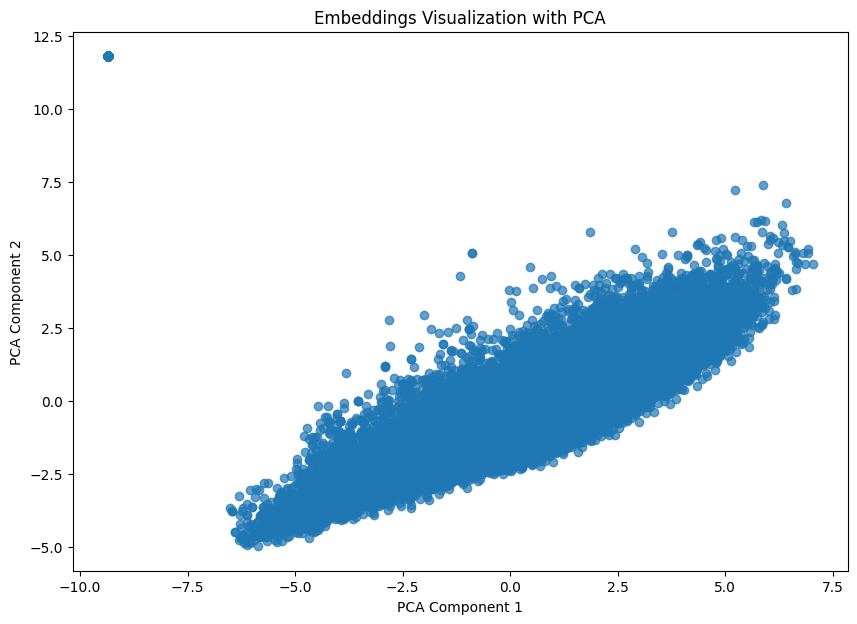

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)
plt.title("Embeddings Visualization with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


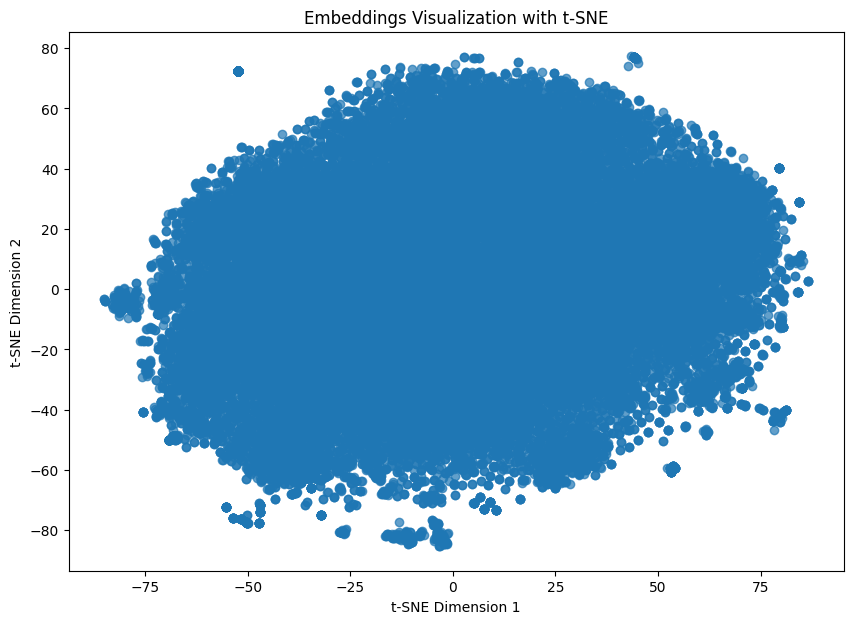

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
reduced_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], alpha=0.7)
plt.title("Embeddings Visualization with t-SNE")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [79]:
def get_word_embedding(sentence, target_word):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    token_embeddings = outputs.last_hidden_state
    word_tokens = [i for i, token in enumerate(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])) if token == target_word]
    word_embedding = torch.mean(token_embeddings[0, word_tokens, :], dim=0).detach().numpy()
    return word_embedding

def process_dataframe_with_embeddings(df, text_column, target_word, preserve_columns):
    processed_data = []
    for _, row in df.iterrows():
        sentence = row[text_column]
        embedding = get_word_embedding(sentence, target_word)
        processed_row = {col: row[col] for col in preserve_columns}
        processed_row["Embedding"] = embedding
        processed_data.append(processed_row)
    return pd.DataFrame(processed_data)

In [84]:
preserve_columns = ["poster_ID", "date", "Thread_No"]

In [85]:
embeddf = process_dataframe_with_embeddings(smooch, "T-Text", "dei", preserve_columns)

In [86]:
np.save('11_22_24deionly_embeddings.npy', embeddings)

In [87]:
em = embeddf
em = em[em["Embedding"].apply(lambda x: isinstance(x, np.ndarray) and not np.isnan(x).any())]
em.to_csv("11_22_dei_contextualembeddings.csv")

In [88]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embeds = np.vstack(em["Embedding"].values)
reduced_embeddings = TSNE(n_components=2, random_state=42).fit_transform(embeds)

# Add reduced dimensions to the DataFrame
em["Dim1"] = reduced_embeddings[:, 0]
em["Dim2"] = reduced_embeddings[:, 1]

# Visualize
plt.scatter(em["Dim1"], em["Dim2"], c=em["Thread No"], cmap='viridis')
plt.colorbar(label="Thread No")
plt.title("Contextual Embeddings of 'dei'")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

C:\Users\emzou\AppData\Local\Temp\ipykernel_3476\3782746667.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  em["Dim1"] = reduced_embeddings[:, 0]
C:\Users\emzou\AppData\Local\Temp\ipykernel_3476\3782746667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  em["Dim2"] = reduced_embeddings[:, 1]


KeyError: 'Thread No'